In [1]:
import numpy as np
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import librosa

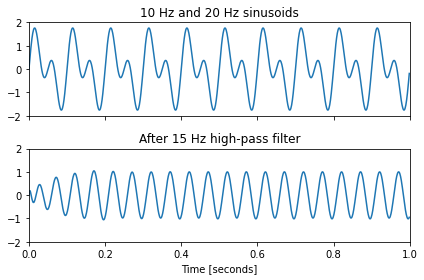

In [2]:
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


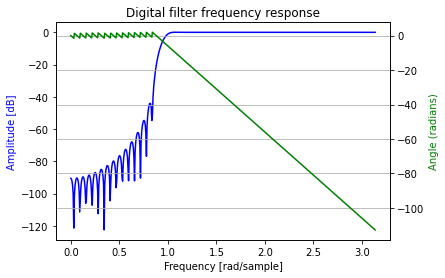

In [3]:
n = 101
b = signal.firwin(n, cutoff = .3, window = "hanning", pass_zero=False)
w, h = signal.freqz(b)

fig = plt.figure()
plt.title('Digital filter frequency response')
cx1 = fig.add_subplot(111)

plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

cx2 = cx1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

In [5]:
# Load a wav file
filename = 'snap1.wav'
y, sr = librosa.load(filename)
sr

22050

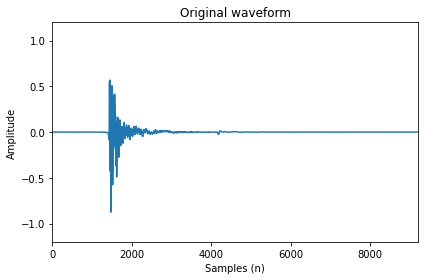

In [6]:
# plot original waveform
plt.plot(y)
plt.title('Original waveform')
plt.axis([0, len(y), -1.2, 1.2])
plt.xlabel('Samples (n)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Frequency (Hz)')

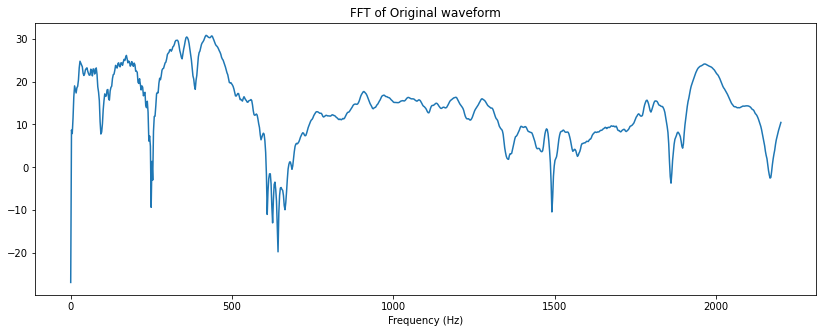

In [7]:
# plot fft of original waveform
N = len(y)
Y = scipy.fft.fft(y[:N])
Y_mag = np.absolute(Y)        # spectral magnitude
f = np.linspace(0, sr, N)     # frequency variable
plt.figure(figsize=(14, 5))
plt.title('FFT of Original waveform')
plt.plot(f[:int(N/10)], 20*np.log10(Y_mag[:int(N/10)])) # magnitude spectrum
plt.xlabel('Frequency (Hz)')